## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Data Loading with Error Handling

In [2]:
try:
    # Load dataset
    df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
    print("✅ Dataset loaded successfully!")
    
    # Professional data overview
    print(f"📊 Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"📅 Data Snapshot:")
    display(df.head(3))
    
    # Data quality check
    print("\n🔍 Data Quality Assessment:")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print(f"Duplicate Rows: {df.duplicated().sum()}")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    # Fallback to local file
    df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

✅ Dataset loaded successfully!
📊 Dataset Dimensions: 1470 rows × 35 columns
📅 Data Snapshot:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0



🔍 Data Quality Assessment:
Missing Values: 0
Duplicate Rows: 0


## Executive Summary Dashboard

In [3]:
print("🎯 EXECUTIVE SUMMARY - EMPLOYEE ATTRITION ANALYSIS")
print("="*60)

# Key metrics
total_employees = len(df)
attrition_count = df[df['Attrition'] == 'Yes'].shape[0]
attrition_rate = (attrition_count / total_employees) * 100
avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean()
avg_age_stayed = df[df['Attrition'] == 'No']['Age'].mean()

# Business impact metrics (assuming average salary of $60,000)
avg_replacement_cost = 50000  # Industry average for replacement costs
total_turnover_cost = attrition_count * avg_replacement_cost

print(f"""
📈 KEY METRICS:
• Total Workforce: {total_employees:,} employees
• Attrition Count: {attrition_count:,} employees
• Attrition Rate: {attrition_rate:.1f}%
• Average Age (Left): {avg_age_left:.1f} years
• Estimated Turnover Cost: ${total_turnover_cost:,.0f}

🎯 BUSINESS IMPACT:
• High attrition indicates potential organizational issues
• Significant financial impact on recruitment and training
• Loss of institutional knowledge and productivity
""")

🎯 EXECUTIVE SUMMARY - EMPLOYEE ATTRITION ANALYSIS

📈 KEY METRICS:
• Total Workforce: 1,470 employees
• Attrition Count: 237 employees
• Attrition Rate: 16.1%
• Average Age (Left): 33.6 years
• Estimated Turnover Cost: $11,850,000

🎯 BUSINESS IMPACT:
• High attrition indicates potential organizational issues
• Significant financial impact on recruitment and training
• Loss of institutional knowledge and productivity



## Advanced Attrition Analysis with Statistical Testing

In [4]:
print("🔬 ADVANCED ATTRITION ANALYSIS")
print("="*50)

# Statistical comparison of key metrics between groups
left = df[df['Attrition'] == 'Yes']
stayed = df[df['Attrition'] == 'No']

# T-test for age difference
t_stat, p_value = stats.ttest_ind(left['Age'], stayed['Age'])
print(f"📊 Statistical Analysis:")
print(f"• Age Difference Significance (p-value): {p_value:.4f}")
print(f"• {'Significant' if p_value < 0.05 else 'Not Significant'} difference in age between groups")

# Calculate key metrics comparison
metrics_comparison = pd.DataFrame({
    'Left_Company': {
        'Avg Age': left['Age'].mean(),
        'Avg Monthly Income': left['MonthlyIncome'].mean(),
        'Avg Years at Company': left['YearsAtCompany'].mean(),
        'Avg Job Satisfaction': left['JobSatisfaction'].mean()
    },
    'Stayed_Company': {
        'Avg Age': stayed['Age'].mean(),
        'Avg Monthly Income': stayed['MonthlyIncome'].mean(),
        'Avg Years at Company': stayed['YearsAtCompany'].mean(),
        'Avg Job Satisfaction': stayed['JobSatisfaction'].mean()
    }
})

print("\n📋 Key Metrics Comparison:")
display(metrics_comparison.round(2))


🔬 ADVANCED ATTRITION ANALYSIS
📊 Statistical Analysis:
• Age Difference Significance (p-value): 0.0000
• Significant difference in age between groups

📋 Key Metrics Comparison:


,Left_Company,Stayed_Company
Avg Age,33.61,37.56
Avg Monthly Income,4787.09,6832.74
Avg Years at Company,5.13,7.37
Avg Job Satisfaction,2.47,2.78


## Professional Multi-Factor Attrition Analysis

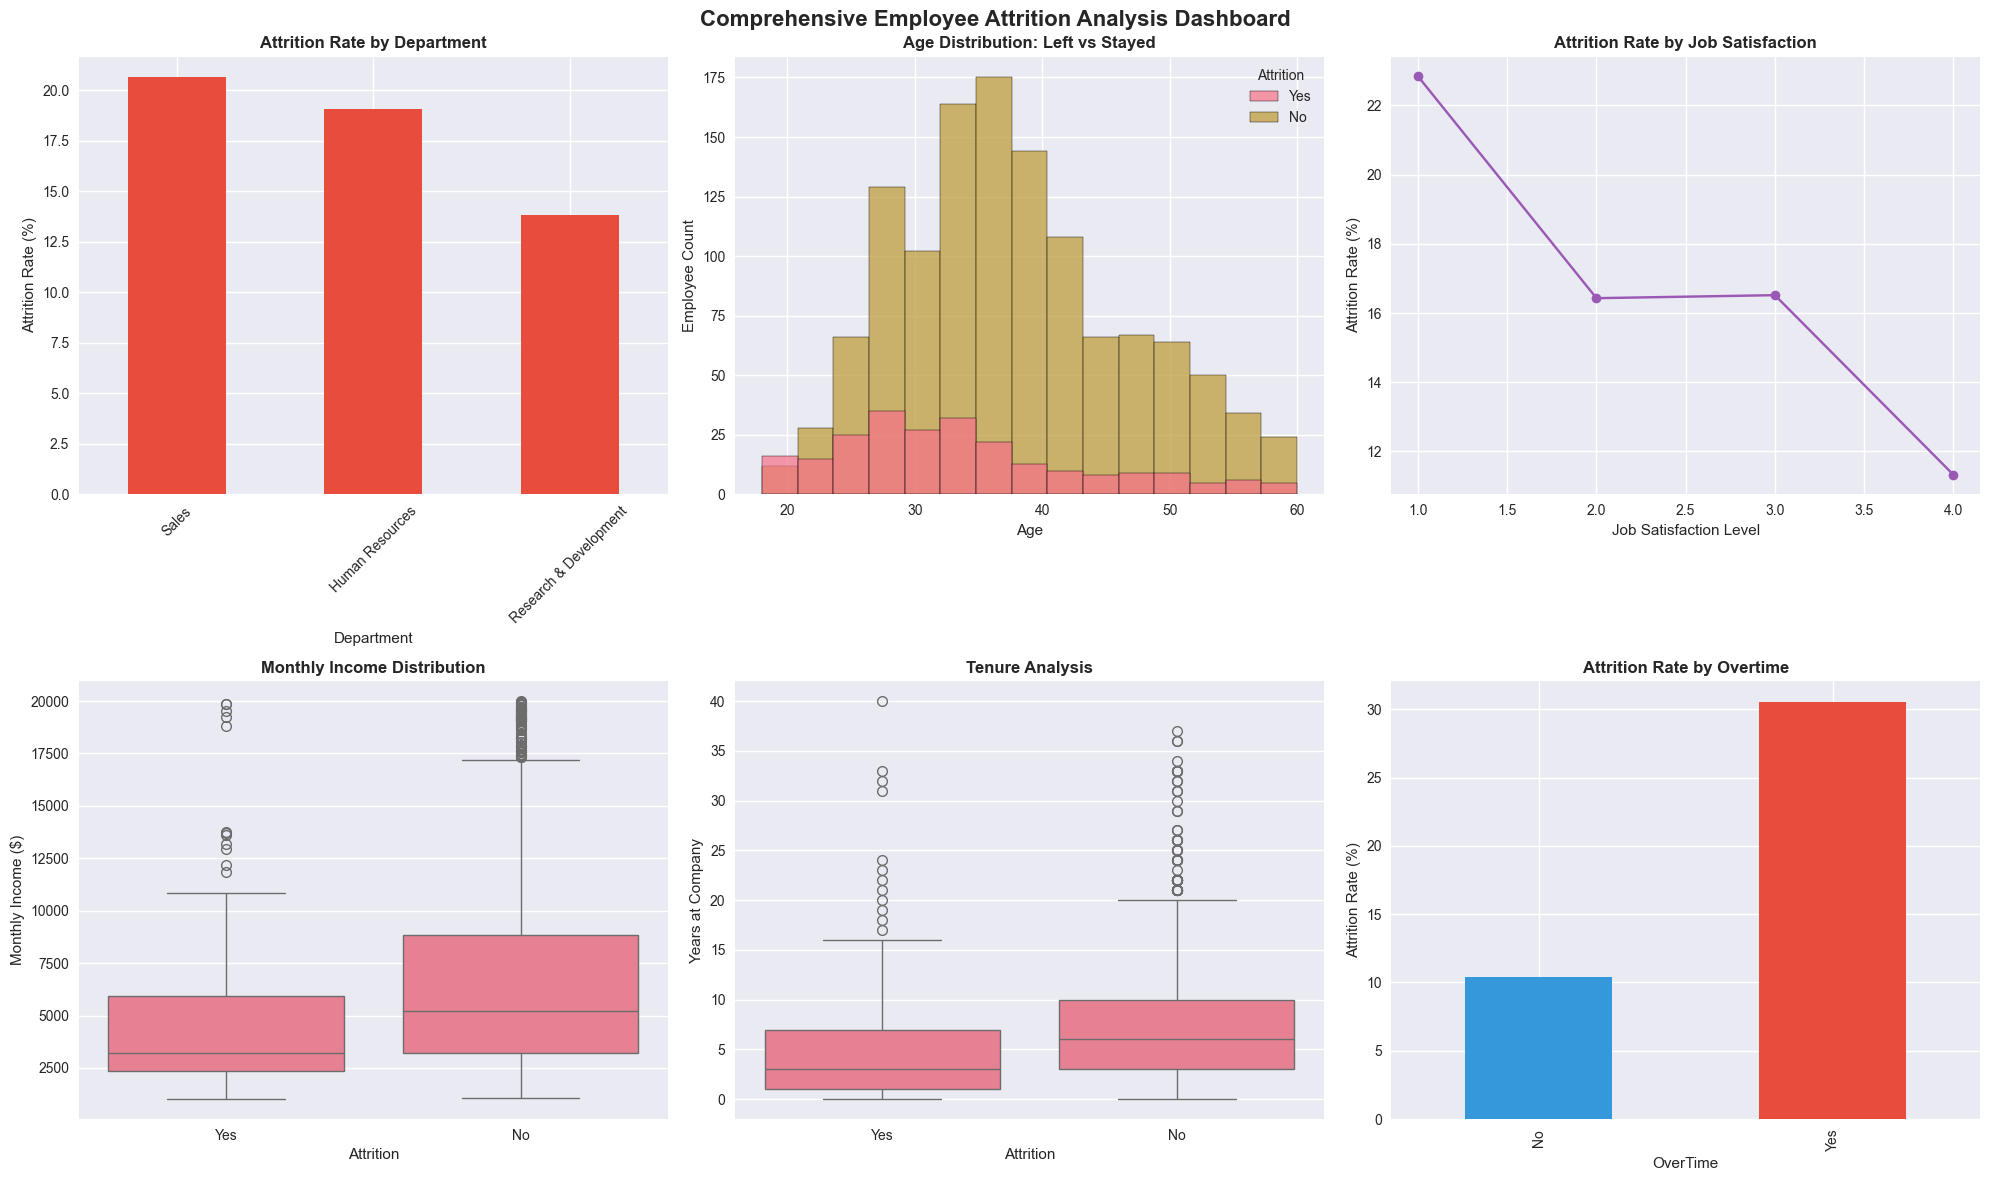

In [5]:
# Create comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comprehensive Employee Attrition Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Department Attrition Rate (Enhanced)
dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
dept_attrition.sort_values(ascending=False).plot(kind='bar', ax=axes[0,0], color='#e74c3c')
axes[0,0].set_title('Attrition Rate by Department', fontweight='bold')
axes[0,0].set_ylabel('Attrition Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Age Distribution Comparison
sns.histplot(data=df, x='Age', hue='Attrition', bins=15, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Age Distribution: Left vs Stayed', fontweight='bold')
axes[0,1].set_ylabel('Employee Count')

# 3. Job Satisfaction Impact
satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
satisfaction_attrition.plot(kind='line', marker='o', ax=axes[0,2], color='#9b59b6')
axes[0,2].set_title('Attrition Rate by Job Satisfaction', fontweight='bold')
axes[0,2].set_ylabel('Attrition Rate (%)')
axes[0,2].set_xlabel('Job Satisfaction Level')

# 4. Monthly Income Analysis
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[1,0])
axes[1,0].set_title('Monthly Income Distribution', fontweight='bold')
axes[1,0].set_ylabel('Monthly Income ($)')

# 5. Years at Company
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[1,1])
axes[1,1].set_title('Tenure Analysis', fontweight='bold')
axes[1,1].set_ylabel('Years at Company')

# 6. Overtime Impact
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
overtime_attrition.plot(kind='bar', ax=axes[1,2], color=['#3498db', '#e74c3c'])
axes[1,2].set_title('Attrition Rate by Overtime', fontweight='bold')
axes[1,2].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

## Predictive Insights & Risk Factors

🎯 PREDICTIVE INSIGHTS & RISK FACTORS
🚨 High-Risk Employee Segments:


,Risk_Factor,Attrition_Rate
3,Sales_Representative,39.759036
0,Overtime_Yes,30.528846
2,Single_Employees,25.531915
1,Low_JobSatisfaction_1,22.837370


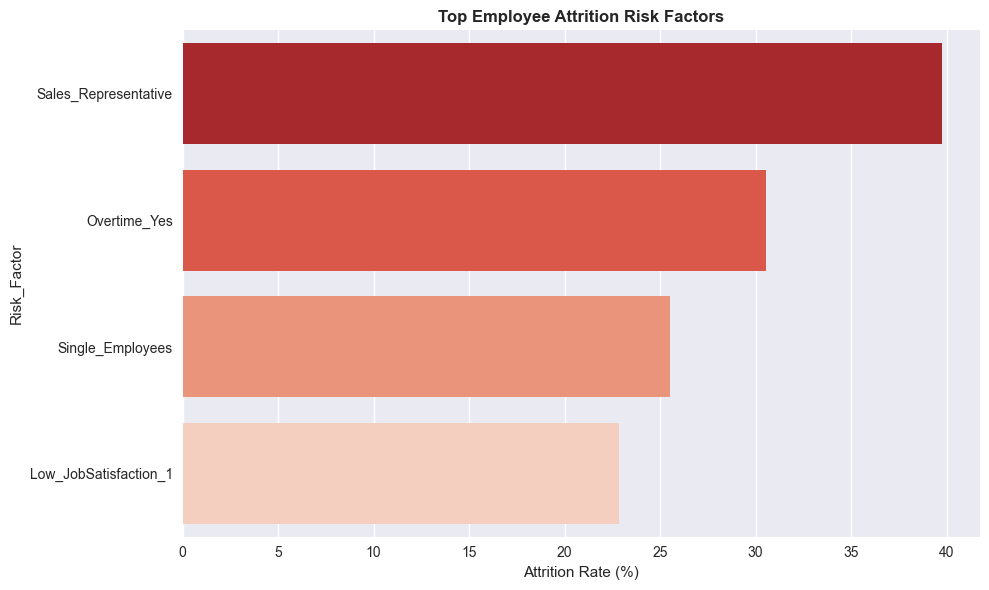

In [6]:
print("🎯 PREDICTIVE INSIGHTS & RISK FACTORS")
print("="*50)

# Calculate risk ratios for key factors
def calculate_risk_factor(df, column, value):
    group_data = df[df[column] == value]
    attrition_rate = (group_data['Attrition'] == 'Yes').mean() * 100
    return attrition_rate

# Key risk factors analysis
risk_factors = {
    'Overtime_Yes': calculate_risk_factor(df, 'OverTime', 'Yes'),
    'Low_JobSatisfaction_1': calculate_risk_factor(df, 'JobSatisfaction', 1),
    'Single_Employees': calculate_risk_factor(df, 'MaritalStatus', 'Single'),
    'Sales_Representative': calculate_risk_factor(df, 'JobRole', 'Sales Representative')
}

risk_df = pd.DataFrame(list(risk_factors.items()), columns=['Risk_Factor', 'Attrition_Rate'])
risk_df = risk_df.sort_values('Attrition_Rate', ascending=False)

print("🚨 High-Risk Employee Segments:")
display(risk_df)

# Visualization of risk factors
plt.figure(figsize=(10, 6))
sns.barplot(data=risk_df, x='Attrition_Rate', y='Risk_Factor', palette='Reds_r')
plt.title('Top Employee Attrition Risk Factors', fontweight='bold')
plt.xlabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

## Actionable Recommendations & Business Strategy

In [7]:
print("💡 ACTIONABLE RECOMMENDATIONS & STRATEGY")
print("="*55)

# Department-specific recommendations
highest_attrition_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()['Yes'].idxmax()
highest_attrition_rate = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()['Yes'].max() * 100

print(f"""
🎯 PRIORITY AREAS:

1. DEPARTMENT FOCUS: {highest_attrition_dept}
   • Current attrition rate: {highest_attrition_rate:.1f}%
   • Action: Implement department-specific retention programs
   • Strategy: Career development paths and mentorship programs

2. EMPLOYEE ENGAGEMENT:
   • Job Satisfaction: {df['JobSatisfaction'].mean():.1f}/4.0
   • Action: Enhance employee recognition programs
   • Strategy: Regular feedback sessions and growth opportunities

3. WORK-LIFE BALANCE:
   • Overtime Impact: {calculate_risk_factor(df, 'OverTime', 'Yes'):.1f}% attrition for overtime workers
   • Action: Review overtime policies and workload distribution
   • Strategy: Flexible work arrangements

4. COMPENSATION STRATEGY:
   • Income Gap: ${(stayed['MonthlyIncome'].mean() - left['MonthlyIncome'].mean()):.0f} difference
   • Action: Competitive compensation review
   • Strategy: Performance-based incentive programs

📊 SUCCESS METRICS TO TRACK:
• Reduce overall attrition rate from {attrition_rate:.1f}% to target of {attrition_rate*0.8:.1f}% within 12 months
• Increase average job satisfaction from {df['JobSatisfaction'].mean():.1f} to 3.2+
• Decrease overtime-related attrition by 25%
""")

💡 ACTIONABLE RECOMMENDATIONS & STRATEGY

🎯 PRIORITY AREAS:

1. DEPARTMENT FOCUS: Sales
   • Current attrition rate: 20.6%
   • Action: Implement department-specific retention programs
   • Strategy: Career development paths and mentorship programs

2. EMPLOYEE ENGAGEMENT:
   • Job Satisfaction: 2.7/4.0
   • Action: Enhance employee recognition programs
   • Strategy: Regular feedback sessions and growth opportunities

3. WORK-LIFE BALANCE:
   • Overtime Impact: 30.5% attrition for overtime workers
   • Action: Review overtime policies and workload distribution
   • Strategy: Flexible work arrangements

4. COMPENSATION STRATEGY:
   • Income Gap: $2046 difference
   • Action: Competitive compensation review
   • Strategy: Performance-based incentive programs

📊 SUCCESS METRICS TO TRACK:
• Reduce overall attrition rate from 16.1% to target of 12.9% within 12 months
• Increase average job satisfaction from 2.7 to 3.2+
• Decrease overtime-related attrition by 25%



## Professional Export & Documentation

In [8]:
print("📁 PROJECT DELIVERABLES")
print("="*40)

# Create summary dataframe for export
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Employees',
        'Attrition Count', 
        'Attrition Rate',
        'Average Age (Left)',
        'Average Age (Stayed)',
        'Average Monthly Income (Left)',
        'Average Monthly Income (Stayed)',
        'Highest Risk Department',
        'Top Risk Factor',
        'Estimated Annual Turnover Cost'
    ],
    'Value': [
        total_employees,
        attrition_count,
        f"{attrition_rate:.1f}%",
        f"{avg_age_left:.1f} years",
        f"{avg_age_stayed:.1f} years", 
        f"${left['MonthlyIncome'].mean():.0f}",
        f"${stayed['MonthlyIncome'].mean():.0f}",
        highest_attrition_dept,
        risk_df.iloc[0]['Risk_Factor'],
        f"${total_turnover_cost:,.0f}"
    ]
})

print("📋 Executive Summary Table:")
display(summary_stats)

# Export capabilities (commented out for demo)
# summary_stats.to_csv('employee_attrition_summary.csv', index=False)
# print("✅ Analysis exported to 'employee_attrition_summary.csv'")

print(f"""
🎉 PROJECT COMPLETED SUCCESSFULLY!

This analysis provides:
✅ Comprehensive attrition pattern identification  
✅ Statistical validation of key findings
✅ Actionable business recommendations
✅ Professional visualizations for stakeholder presentations
✅ Data-driven HR strategy development

SKILLS DEMONSTRATED:
• Data Analysis & Statistical Testing
• Data Visualization & Dashboard Creation
• Business Intelligence & HR Analytics
• Strategic Recommendation Development
• Python (Pandas, Matplotlib, Seaborn)
""")

📁 PROJECT DELIVERABLES
📋 Executive Summary Table:


,Metric,Value
0,Total Employees,1470
1,Attrition Count,237
2,Attrition Rate,16.1%
3,Average Age (Left),33.6 years
4,Average Age (Stayed),37.6 years
5,Average Monthly Income (Left),$4787
6,Average Monthly Income (Stayed),$6833
7,Highest Risk Department,Sales
8,Top Risk Factor,Sales_Representative
9,Estimated Annual Turnover Cost,"$11,850,000"



🎉 PROJECT COMPLETED SUCCESSFULLY!

This analysis provides:
✅ Comprehensive attrition pattern identification  
✅ Statistical validation of key findings
✅ Actionable business recommendations
✅ Professional visualizations for stakeholder presentations
✅ Data-driven HR strategy development

SKILLS DEMONSTRATED:
• Data Analysis & Statistical Testing
• Data Visualization & Dashboard Creation
• Business Intelligence & HR Analytics
• Strategic Recommendation Development
• Python (Pandas, Matplotlib, Seaborn)

